<a href="https://colab.research.google.com/github/Aryan-2602/data_scientist_salary_prediction/blob/main/DATA_SCIENTIST_SALARY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING REQUIRED MODULES:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
import warnings
from pylab import *
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

DATA EXPLORATION:

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.drop('Unnamed: 0', axis = 1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
df.shape

(607, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Text(0.5, 1.0, 'Distribution of Missing Values')

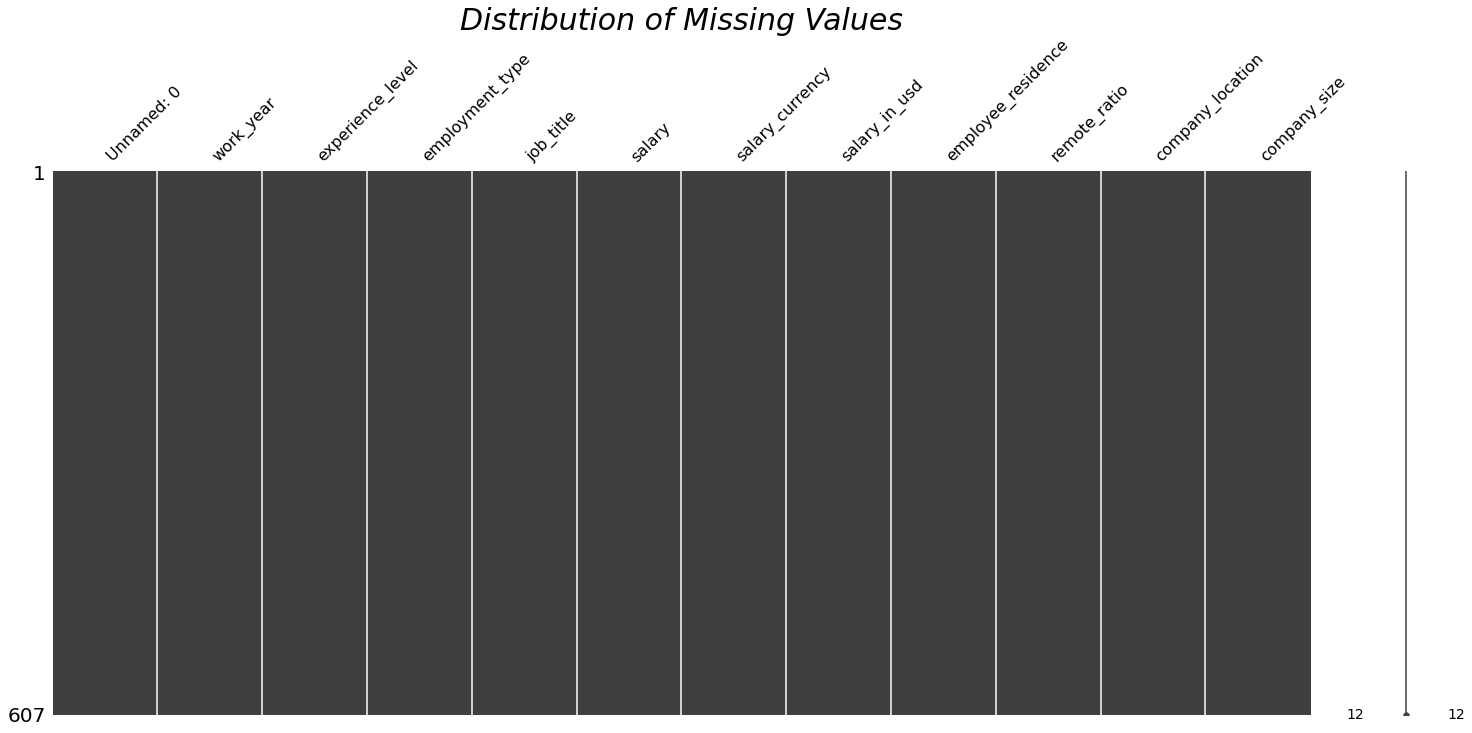

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

In [ ]:
result = df.dtypes
print(result)

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [ ]:
df.corr()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


In [ ]:
df.drop(['salary','salary_currency'],axis = 1,inplace = True)
df.rename(columns = {'salary_in_usd' : 'salary'},inplace = True)

EXPLORATORY DATA ANALYSIS:

In [ ]:
warnings.filterwarnings("ignore")

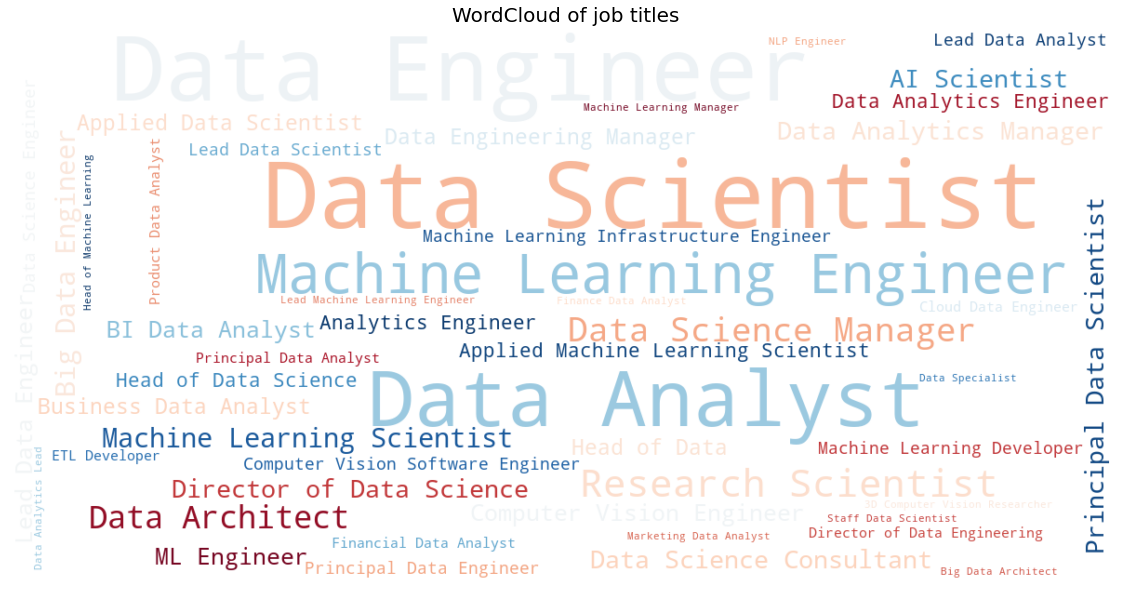

In [ ]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200,
               height=600,
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88,
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'white','RdBu', 'WordCloud of job titles')

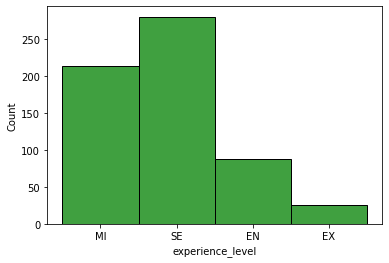

In [ ]:
sns.histplot(df['experience_level'], color = 'green')

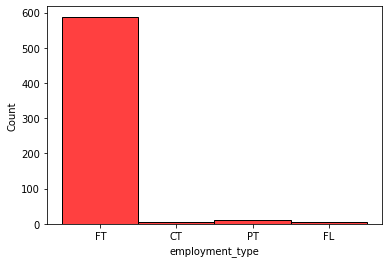

In [ ]:
sns.histplot(df['employment_type'],color = 'red')

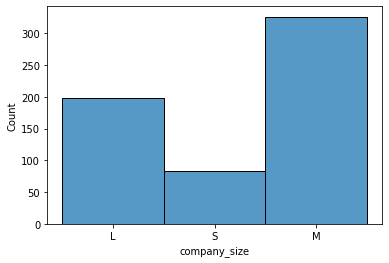

In [ ]:
sns.histplot(df['company_size'])

In [ ]:
df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

[Text(0, 0, 'DE'),
 Text(0, 0, 'JP'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'HN'),
 Text(0, 0, 'US'),
 Text(0, 0, 'HU'),
 Text(0, 0, 'NZ'),
 Text(0, 0, 'FR'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'PK'),
 Text(0, 0, 'PL'),
 Text(0, 0, 'PT'),
 Text(0, 0, 'CN'),
 Text(0, 0, 'GR'),
 Text(0, 0, 'AE'),
 Text(0, 0, 'NL'),
 Text(0, 0, 'MX'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'AT'),
 Text(0, 0, 'NG'),
 Text(0, 0, 'PH'),
 Text(0, 0, 'ES'),
 Text(0, 0, 'DK'),
 Text(0, 0, 'RU'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'HR'),
 Text(0, 0, 'BG'),
 Text(0, 0, 'SG'),
 Text(0, 0, 'BR'),
 Text(0, 0, 'IQ'),
 Text(0, 0, 'VN'),
 Text(0, 0, 'BE'),
 Text(0, 0, 'UA'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'CL'),
 Text(0, 0, 'RO'),
 Text(0, 0, 'IR'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'KE'),
 Text(0, 0, 'SI'),
 Text(0, 0, 'HK'),
 Text(0, 0, 'TR'),
 Text(0, 0, 'RS'),
 Text(0, 0, 'PR'),
 Text(0, 0, 'LU'),
 Text(0, 0, 'JE'),
 Text(0, 0, 'CZ'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'DZ'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'MY'),
 Text(0, 0, 

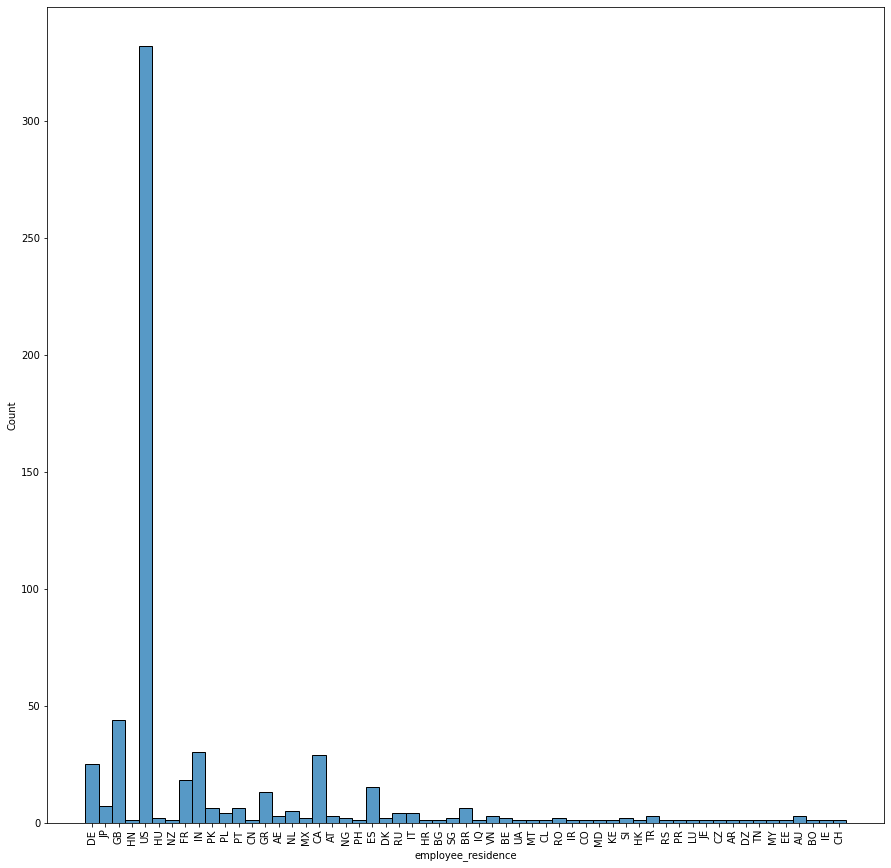

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.histplot(df['employee_residence'])
ax.set_xticks = df['employee_residence']
ax.set_xticklabels(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'],rotation = 90)

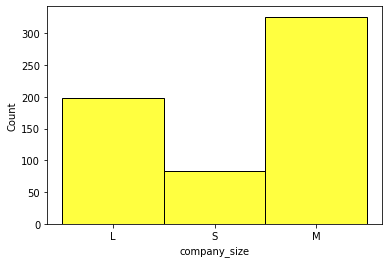

In [ ]:
sns.histplot(df['company_size'],color = 'yellow')

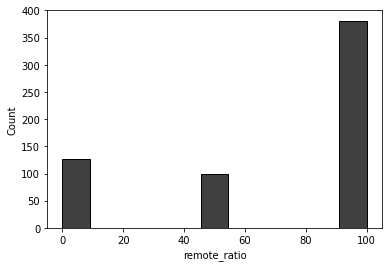

In [ ]:
sns.histplot(df['remote_ratio'],color = 'black')

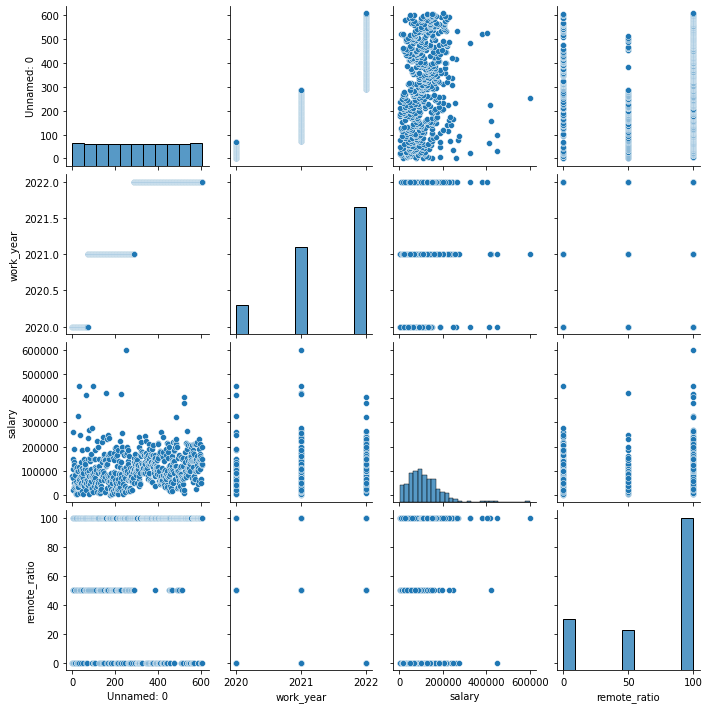

In [ ]:
sns.pairplot(df)

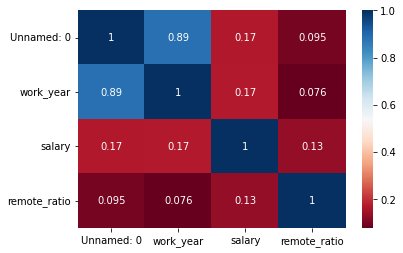

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

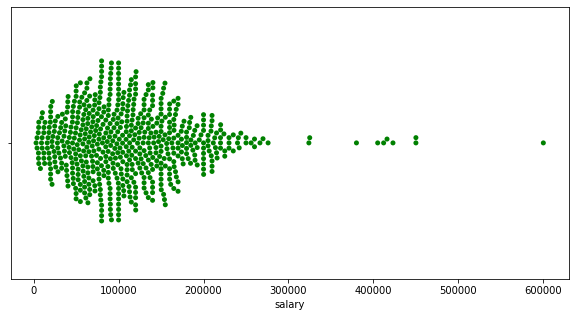

In [ ]:
plt.figure(figsize = (10,5))
plot = sns.swarmplot(df['salary'], color = 'green')

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text major ticklabel objects>)

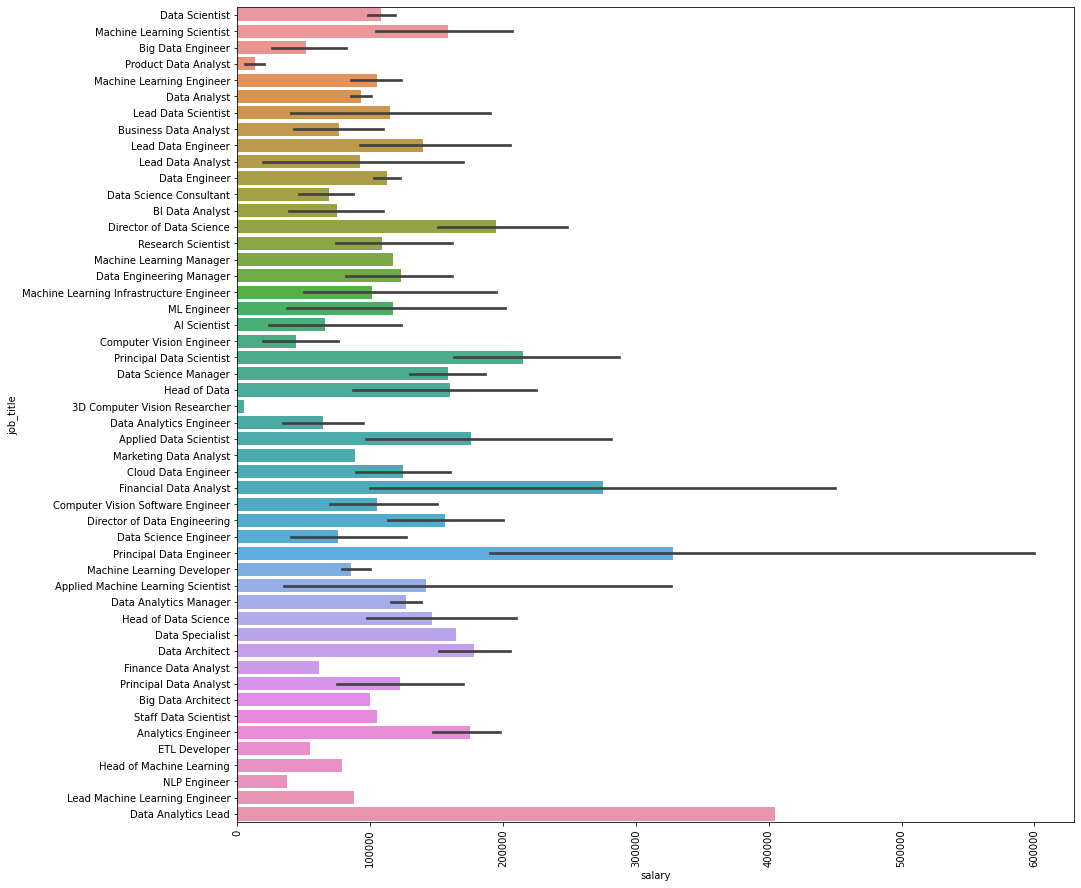

In [ ]:
plt.figure(figsize=(15,15))
plot = sns.barplot(y='job_title',x='salary',data=df)
plt.xticks(rotation=90)

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 <a list of 10 Text major ticklabel objects>)

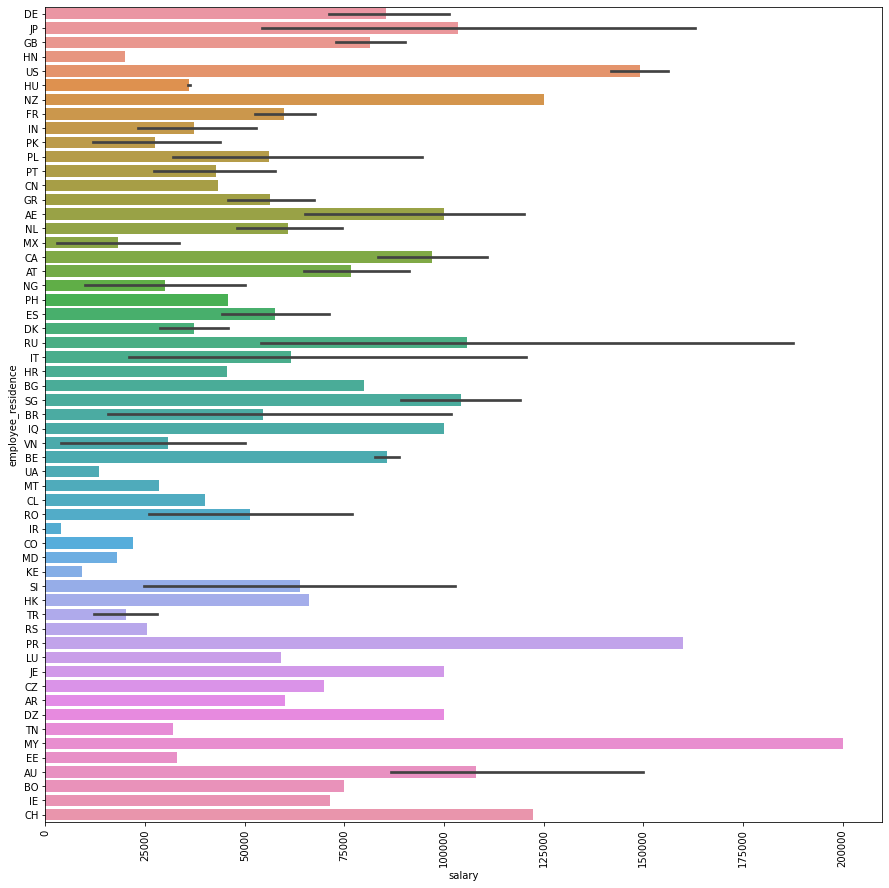

In [ ]:
plt.figure(figsize=(15,15))
plot = sns.barplot(y='employee_residence',x='salary',data=df)
plt.xticks(rotation=90)

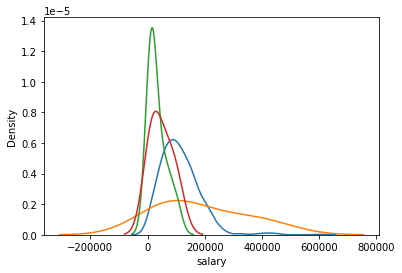

In [ ]:
sns.distplot(df[df['employment_type']=='FT']['salary'],hist=False)
sns.distplot(df[df['employment_type']=='CT']['salary'],hist=False)
sns.distplot(df[df['employment_type']=='PT']['salary'],hist=False)
sns.distplot(df[df['employment_type']=='FL']['salary'],hist=False)

From the above graph we can discern that the salaries do vary substantially w.r.t the employment type. The following conclusions can be drawn:


*   For full time employees the starting salary is greater than for the other 3 however the density of those salaries is the 2nd lowest. Also is has the 2nd highest salaries however their densities are less.


*   For contractual employees the density of salaries is the lowest as well as having the lowest base salaries out of all employees. They also however have the highest salaries albeit in low density.


*   For part-time workers the density of salaries is the highest in the range near 0 however they have the narrowest salary range and the lowest salary cap.


*   For freelancers similar conclusions can be drawn.





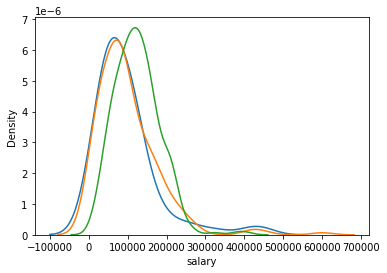

In [ ]:
sns.distplot(df[df['work_year']== 2020]['salary'],hist=False)
sns.distplot(df[df['work_year']== 2021]['salary'],hist=False)
sns.distplot(df[df['work_year']== 2022]['salary'],hist=False)

From the above graph we can discern that the salaries do not vary much w.r.t work years 2020 and 2021. In the case of work year 2022 the density is a little greater than 2020 and 2021 and the starting salary is greater as well. For 2021 the highest salaries are greater than for 2020 and 2022 however the density of those values are less.

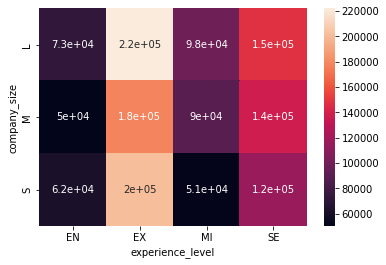

In [ ]:
df_new=df.pivot_table(values='salary',index='company_size',columns='experience_level')
sns.heatmap(df_new,annot=True)



*   Experienced employees in large companies have the highest salary
*   Mid level employees in small companies have the lowest salary



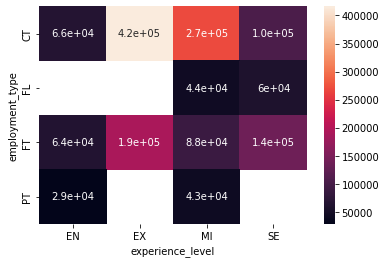

In [ ]:
df_new=df.pivot_table(values='salary',index='employment_type',columns='experience_level')
sns.heatmap(df_new,annot=True)



*   Experienced employees working on a contract receive the highest salary.
*   Entry level employees working on a part-time basis receive the lowest salary.



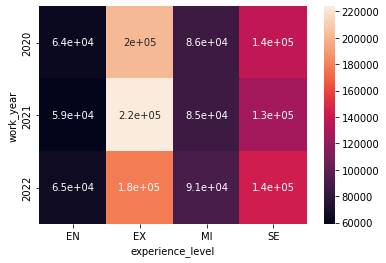

In [ ]:
df_new=df.pivot_table(values='salary',index='work_year',columns='experience_level')
sns.heatmap(df_new,annot=True)



*   Experienced employees in 2021 earned the highest salary.
*   Entry level employees in 2021 earned the lowest salary.



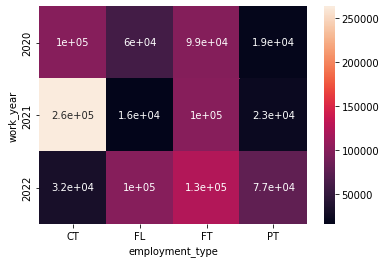

In [ ]:
df_new=df.pivot_table(values='salary',index='work_year',columns='employment_type')
sns.heatmap(df_new,annot=True)



*   Contractual employees in 2021 earned the highest salary.
*   Freelancers in 2021 earnes the lowest.



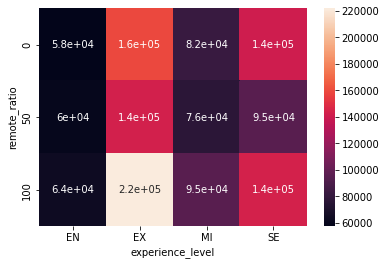

In [ ]:
df_new=df.pivot_table(values='salary',index='remote_ratio',columns='experience_level')
sns.heatmap(df_new,annot=True)

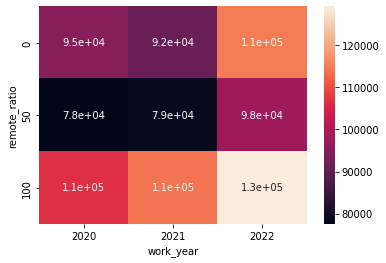

In [ ]:
df_new=df.pivot_table(values='salary',index='remote_ratio',columns='work_year')
sns.heatmap(df_new,annot=True)

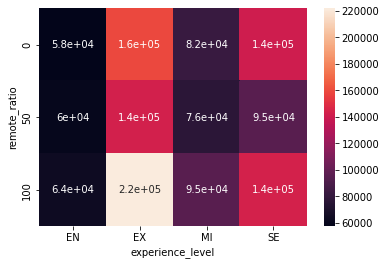

In [ ]:
df_new=df.pivot_table(values='salary',index='remote_ratio',columns='experience_level')
sns.heatmap(df_new,annot=True)

In [ ]:
df.corr()['salary']

Unnamed: 0      0.167025
work_year       0.170493
salary          1.000000
remote_ratio    0.132122
Name: salary, dtype: float64

In [ ]:
df.pivot_table(values='salary', index='work_year', columns='experience_level')

experience_level,EN,EX,MI,SE
work_year,,,,
2020,63648.600000,202416.500000,85950.062500,137240.500000
2021,59101.021277,223752.727273,85490.088889,126596.188406
2022,65423.428571,178313.846154,91193.956044,143043.398964


In [ ]:
df.pivot_table(values='salary', index='remote_ratio', columns='experience_level')

experience_level,EN,EX,MI,SE
remote_ratio,,,,
0,57666.357143,158948.666667,82129.696429,141177.759259
50,60099.280000,143175.400000,76460.642857,95250.888889
100,63567.367347,221748.333333,95065.652174,143806.376884


In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
encoder = LabelEncoder()
salary = encoder.fit_transform(df.salary)
df['salary'] = salary

In [ ]:
y = df['salary']

In [ ]:
df.drop('salary', axis = 1, inplace = True)
X = pd.get_dummies(data = df, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ",y_test.shape)

x train:  (485, 165)
x test:  (122, 165)
y train:  (485,)
y test:  (122,)


In [ ]:
CV=[]
R2_train=[]
R2_test=[]
def pred_model(model, model_name):
    model.fit(X_train, y_train)

    #Calculating R2 score of train subset
    y_pred_train=model.predict(X_train)
    R2_train_model=r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))

    #Calculating R2 score of test subset
    y_pred_test=model.predict(X_test)
    R2_test_model=r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model,2))

    #R2 mean of train subset using Cross Validation
    cross_val=cross_val_score(model, X_train, y_train, cv=5)
    cv_mean=cross_val.mean()
    CV.append(round(cv_mean, 2))

    print("Train R2 score: ", round(R2_train_model,2))
    print("Test R2 score: ", round(R2_test_model,2))
    print("Train CV scores: ",cross_val)
    print("Train CV mean: ", round(cv_mean,2))

    #Plotting graphs
    fig, ax= plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    #Y_test VS. Y_train scatter plot
    ax[1].set_title('y_test VS. y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Train R2 score:  0.79
Test R2 score:  0.65
Train CV scores:  [0.4158203  0.45457051 0.47421889 0.42728501 0.51702276]
Train CV mean:  0.46


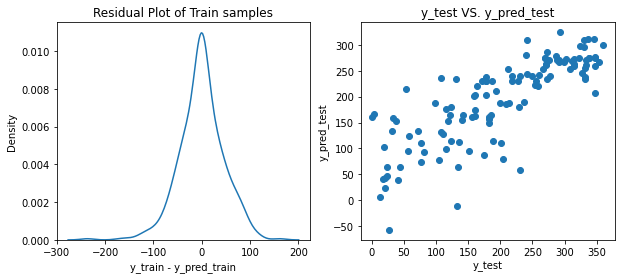

In [ ]:
lr=LinearRegression()
pred_model(lr, "Linear_regressor.pkl")

Train R2 score:  0.72
Test R2 score:  0.71
Train CV scores:  [0.60217816 0.59229561 0.69198781 0.61273114 0.68233325]
Train CV mean:  0.64


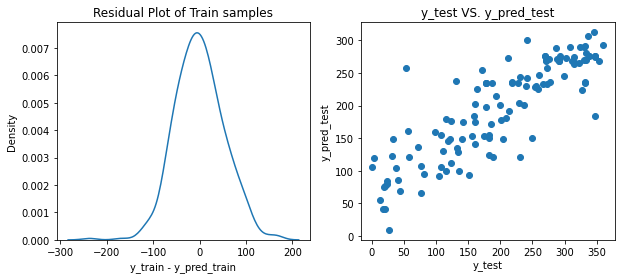

In [ ]:
#Creating Ridge model object
rg=Ridge()
#Range of Alpha
alpha = np.logspace(-3,3,num=14)

#Creating Randomized Search CV in order to find the best estimator of hyperparameter
rg_rs=RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))

pred_model(rg_rs, "ridge.pkl")

Train R2 score:  0.72
Test R2 score:  0.73
Train CV scores:  [0.58397141 0.5650518  0.66779873 0.60715466 0.65796978]
Train CV mean:  0.62


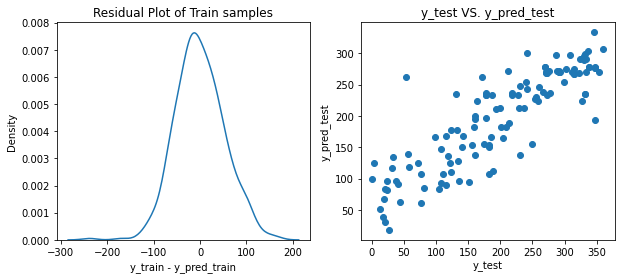

In [ ]:
ls=Lasso()
alpha=np.logspace(-3,3,num=14) #range for alpha

ls_rs=RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))
pred_model(ls_rs,'lasso.pkl')

Train R2 score:  0.71
Test R2 score:  0.63
Train CV scores:  [0.56154252 0.45741952 0.58675433 0.5809959  0.62108316]
Train CV mean:  0.56


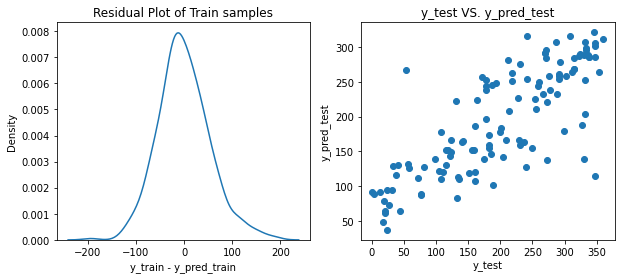

In [ ]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
pred_model(rf_rs,'random_forest.pkl')

Train R2 score:  0.75
Test R2 score:  0.69
Train CV scores:  [0.60810076 0.53861135 0.62564121 0.58659653 0.66170672]
Train CV mean:  0.6


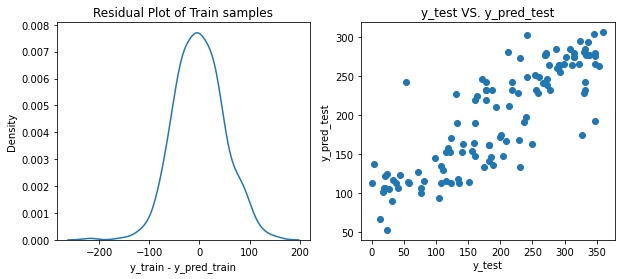

In [ ]:
gb=GradientBoostingRegressor()

#Rate at which correcting is made
learning_rate=[0.001, 0.01, 0.1, 0.2]
#Number of trees in Gradient Boosting
n_estimators=list(range(500,1000,100))
#Maxiumum number of levels in a tree
max_depth=list(range(4,9,4))
#Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
#Minimum number of samples required to be at a leaf node
min_samples_leaf=[1,2,5,7]
#Number of features to be consdered at each split
max_features=['auto', 'sqrt']

#Hyperparameters dict
param_grid={"learning_rate": learning_rate, "n_estimators":n_estimators, "max_depth": max_depth, "min_samples_split":min_samples_split, "min_samples_leaf": min_samples_leaf, "max_features": max_features}

gb_rs=RandomizedSearchCV(estimator=gb, param_distributions=param_grid)
pred_model(gb_rs, "gradient_boosting.pkl")

In [ ]:
Technique=['LinearRegression', "Ridge", "Lasso", "RandomForestRegressor", "GradientBoostingRegressor"]
stats=pd.DataFrame({'Model':Technique, "R Squared(Train)": R2_train, "R Squared(Test)":R2_test, "CV score mean (train)":CV})
display(stats)

ValueError: ignored